In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

Initialize variables for testing, knobs, etc.

In [3]:
test_size = 200
k = 3

Load data from file, store in a variable called data, then print to check if it worked

In [4]:
# Load data
filename = 'C:/users/brandonwood/desktop/create/2017.csv'

def openf(filename):
    data = []
    with open(filename, 'r') as csvfile:
        plots = csv.reader(csvfile, delimiter = ',')
        for row in plots:
            data.append(row)
    return data
data = openf(filename)
print(data[0])

['0.38', '0.53', '2', '157', '3', '0', '1', '0', 'low']


Here we clean the data.The last column of every person in the data set is their wage, grouped as either low, medium, or high. We convert those into real numbers and turn that into a numpy arrray

In [5]:
# Conver wage classes into real numbers
def convert_from_dict(data, salaries):
    for person in data:
        for key, val in salaries.items():
            if person[8] == key:
                person[8] =  val
    return data
salaries = {'low': .2,
            'medium': .5,
            'high' : 1
            }
data = convert_from_dict(data, salaries)
print(data[-1])

# Convert to numpy array
data = np.asarray(data)

['0.37', '0.52', '2', '158', '3', '0', '1', '0', 0.2]


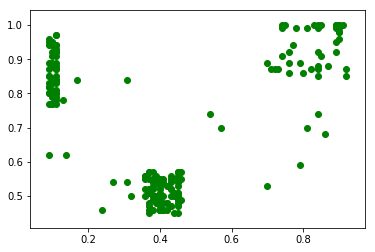

In [6]:
plt.scatter(data[:test_size,0], data[:test_size,1], color = 'g')
plt.show()

In [7]:
# Randomly select centroids
def init_centroids(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
# Randomly Init with 3 centroids
centroids = init_centroids(data, k)
print(centroids)

[['0.74' '0.64' '3' '136' '2' '0' '0' '0' '0.5']
 ['0.73' '0.55' '3' '149' '3' '0' '0' '0' '0.2']
 ['0.39' '0.48' '2' '160' '3' '0' '1' '0' '0.2']]


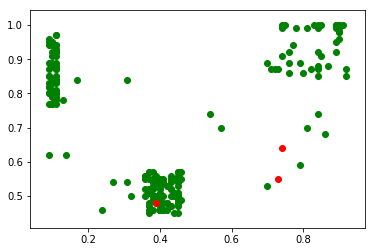

In [8]:
# Draw some of the data with centroids
plt.scatter(data[:test_size,0], data[:test_size,1], color = 'g')
plt.scatter(centroids[:,0], centroids[:,1], color ='r')
plt.show()

Now that we have the data and the centroids, we can start running the algorithm. The k-means algorithm works in two steps: group the data into clusters, then move the centroids towards the center of their clusters. We do this until no more data points move clusters after the centroids move.

Step 1 Definitions - assigning clusters

In [9]:
# Defining distance function - used in error later
def distance(p, q):
    p = p.astype(float)
    q = q.astype(float)
    return np.linalg.norm(p-q)

# Step 1: cluster assignment
def assign_everyone():
    # Make new cluster every time - need to compare to last to determine when algorithm stops
    # Make an empty array in the cluster array for each centroid
    clusters = [ [] for num in range(len(centroids))]
    # Loop through each person for assignment
    
    for person in data:
        closest = 0
        # Check each centroid
        for num, centroid in enumerate(centroids):
            if distance(person, centroid) < distance(person, centroids[closest]):
                closest = num
        # Add person to cluster that corresponds to closest centroid
    
        clusters[num].append(person)
    return clusters 

Step 2 Definitions - moving centroids around

In [20]:
def average(cluster):
    print(cluster)
    averaged = [ [] for a in range(len(cluster[0])) ]
    for person in cluster:
        for ind, aspect in enumerate(pers):
            averaged[ind] += aspect
    print(averaged)
def move_centroids(clusters):
    new_centroids = []
    for num, centroid in enumerate(centroids):
        avg = average(clusters[num])
        new_centroids.append(avg)
    return np.matrix(new_centroids)


c = assign_everyone()
centroids = move_centroids(c)

# plt.scatter(data[:test_size,0], data[:test_size,1], color = 'g')
# plt.scatter(centroids[:,0], centroids[:,1], color ='r')

# plt.show()

[]


IndexError: list index out of range

Run Algorithm